Saving datos_preprocesados (1).csv to datos_preprocesados (1) (6).csv
Datos cargados correctamente con 32142 filas y 18 columnas.

Codificación realizada. Primeras filas de 'income_encoded':
   income  income_encoded
0   <=50K               0
1   <=50K               0
2   <=50K               0
3   <=50K               0
4   <=50K               0
Nuevas columnas tras codificación: 105
Tamaño del conjunto de entrenamiento: 25713 registros
Tamaño del conjunto de prueba: 6429 registros
Modelo entrenado con éxito.


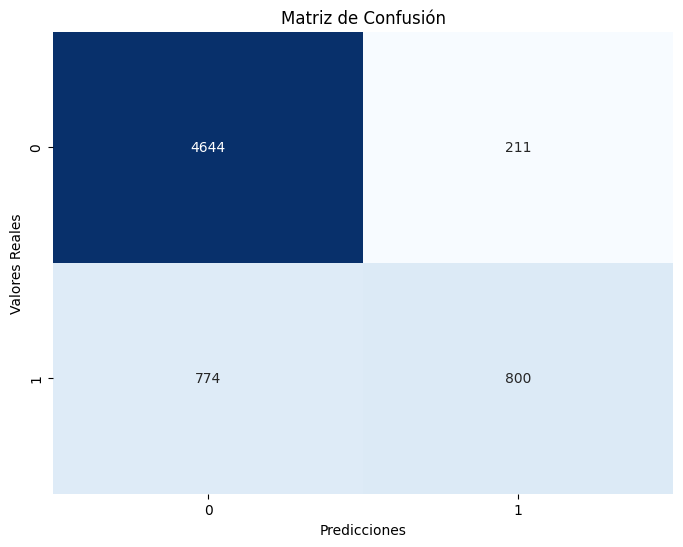


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      4855
           1       0.79      0.51      0.62      1574

    accuracy                           0.85      6429
   macro avg       0.82      0.73      0.76      6429
weighted avg       0.84      0.85      0.83      6429



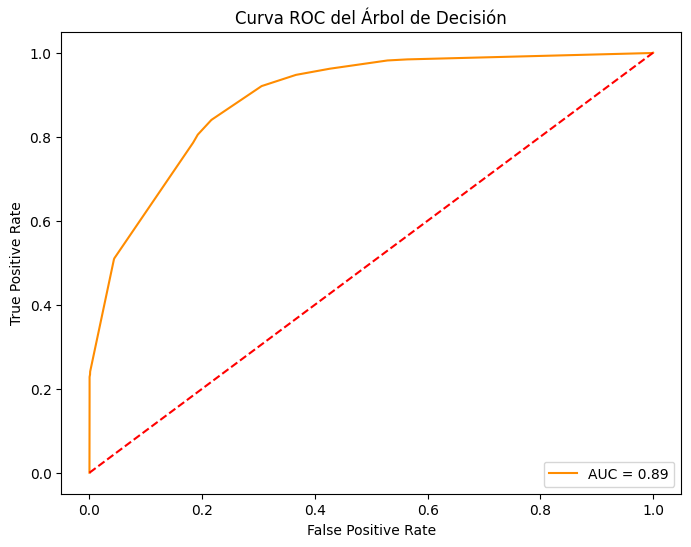

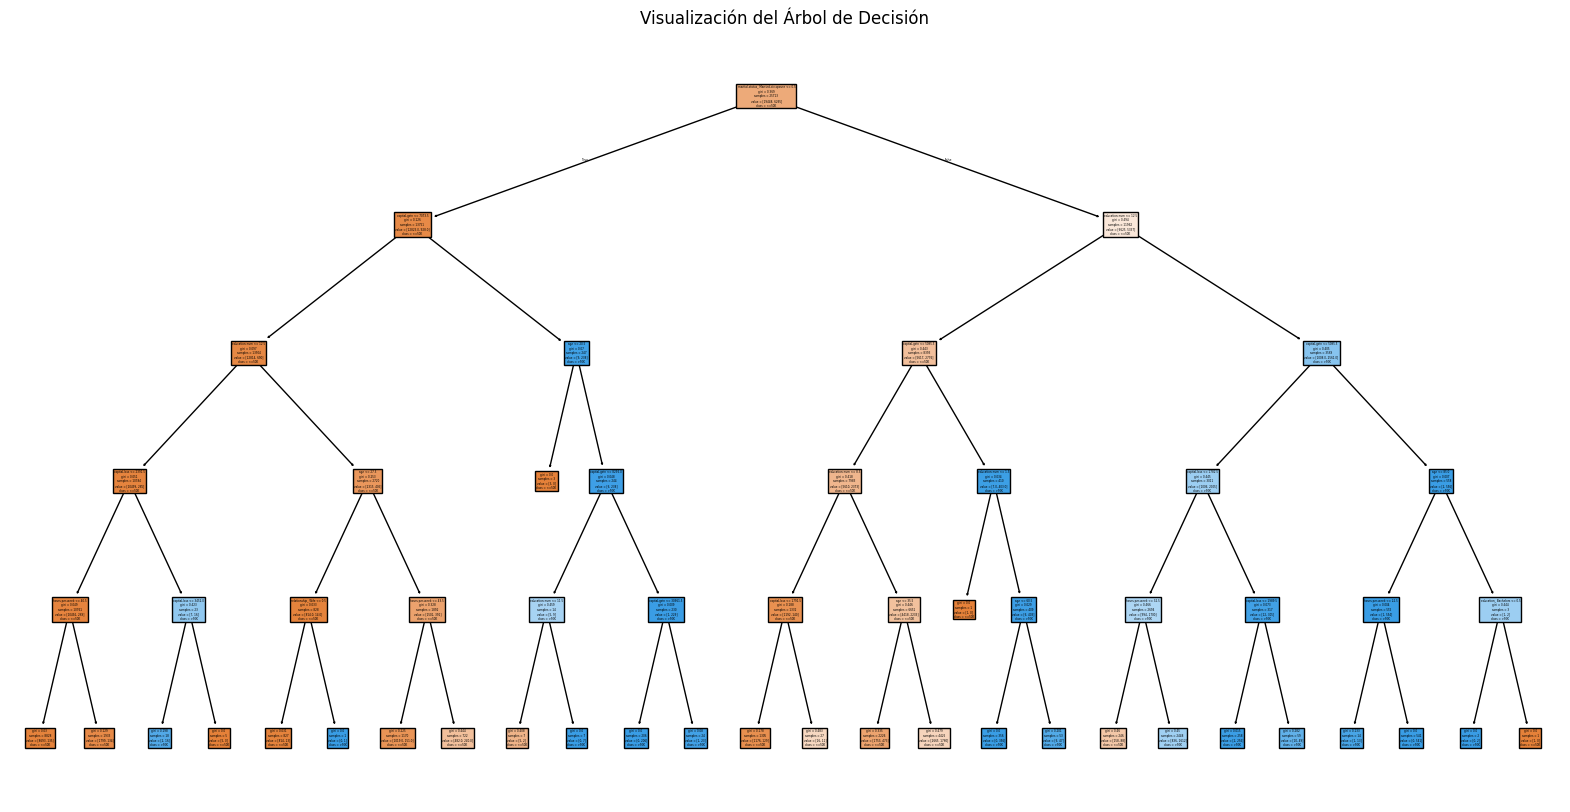


Texto del Árbol de Decisión:
|--- marital-status_ Married-civ-spouse <= 0.50
|   |--- capital-gain <= 7073.50
|   |   |--- education-num <= 12.50
|   |   |   |--- capital-loss <= 2391.50
|   |   |   |   |--- hours-per-week <= 40.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- hours-per-week >  40.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- capital-loss >  2391.50
|   |   |   |   |--- capital-loss <= 3452.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- capital-loss >  3452.00
|   |   |   |   |   |--- class: 0
|   |   |--- education-num >  12.50
|   |   |   |--- age <= 27.50
|   |   |   |   |--- relationship_ Wife <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- relationship_ Wife >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- age >  27.50
|   |   |   |   |--- hours-per-week <= 43.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- hours-per-week >  43.50
|   |   |   |   |   |--- class: 0
|   |--- capital-gain >  7073.50
|   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Subir archivo CSV
uploaded = files.upload()
nombre_archivo = list(uploaded.keys())[0]
df = pd.read_csv(nombre_archivo)
print(f"Datos cargados correctamente con {df.shape[0]} filas y {df.shape[1]} columnas.")

# Codificación de la variable 'income'
if 'income_encoded' not in df.columns:
    le = LabelEncoder()
    df['income_encoded'] = le.fit_transform(df['income'])
    print("\nCodificación realizada. Primeras filas de 'income_encoded':")
    print(df[['income', 'income_encoded']].head())

# Separar X (características) e y (objetivo)
X = df.drop(columns=['income', 'income_encoded'])  # Variables independientes
y = df['income_encoded']  # Variable objetivo

# Codificación de variables categóricas con dummies
X = pd.get_dummies(X, drop_first=True)
print(f"Nuevas columnas tras codificación: {X.shape[1]}")

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} registros")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} registros")

# Entrenamiento del modelo
modelo = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
modelo.fit(X_train, y_train)
print("Modelo entrenado con éxito.")

# Evaluación del modelo
y_pred = modelo.predict(X_test)

# 1. Matriz de Confusión con visualización
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

# 2. Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 3. Curva ROC y AUC
y_pred_proba = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del Árbol de Decisión')
plt.legend(loc='lower right')
plt.show()

# 4. Visualización del árbol de decisión
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(modelo, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

# 5. Texto del Árbol de Decisión
from sklearn.tree import export_text
print("\nTexto del Árbol de Decisión:")
print(export_text(modelo, feature_names=list(X.columns)))

# 6. Exportar CSV final
df.to_csv('datos_final_modelo.csv', index=False)
print("\nArchivo 'datos_final_modelo.csv' guardado correctamente.")


Reporte de Clasificación:

Precisión Global (Accuracy): 85%. Esto indica que el modelo predijo correctamente el ingreso (<=50K o >50K) en el 85% de los casos.
Clase <=50K (0):
Precision: 86%
Recall: 96% (el modelo es muy preciso para detectar esta clase).
Clase >50K (1):
Precision: 79%
Recall: 51% (la clase >50K es más difícil de identificar, indicando un desbalance o complejidad en los datos).
Texto del Árbol de Decisión:

La estructura muestra cómo el modelo toma decisiones:
Por ejemplo, si una persona está casada (marital-status) y tiene un capital-gain alto, se predice con más probabilidad >50K.
Si tiene una educación baja y pocas horas trabajadas, la predicción tiende a <=50K.
Reglas importantes detectadas por el modelo:

Edad y educación: Las personas más jóvenes con educación alta tienen más probabilidades de estar en >50K.
Horas trabajadas: Un número bajo de horas trabajadas suele estar correlacionado con <=50K.

conclision de los resultados
Precisión Global: 85%.
Clase <=50K (0): Alta precisión (96%).
Clase >50K (1): Precisión moderada (51%), lo que indica una menor capacidad de identificar ingresos altos.

aqui la actividad 1 para enseñar de dodne provienen los datos para entrenar el modelo

Saving adult.data.txt to adult.data (2).txt
Tamaño del dataset: 32561 filas y 15 columnas
Se eliminaron 24 duplicados. Tamaño actual: 32537 filas
Registros eliminados por edades fuera de rango: 395

Valores faltantes por variable:
workclass         1772
occupation        1778
native-country     580
dtype: int64

Valores faltantes después del tratamiento:
0

Distribución de la variable 'grupo_edad':
grupo_edad
Adulto          15520
Joven            9613
Adulto Mayor     5920
Senior            539
Name: count, dtype: int64


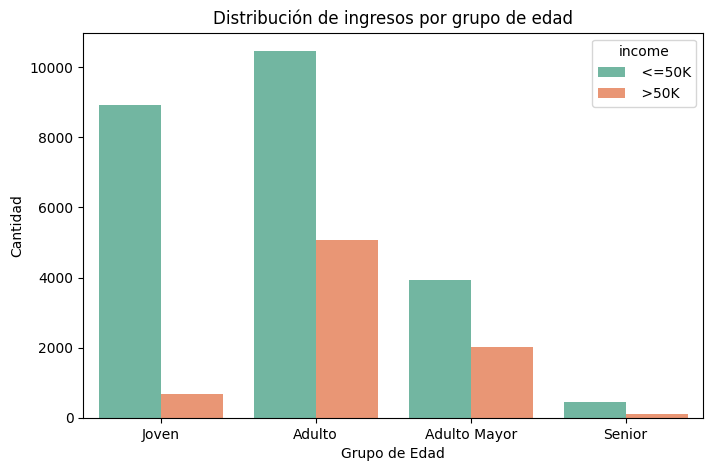


Primeras filas de la variable normalizada 'horas_normalizadas':
   hours-per-week  horas_normalizadas
0              40           -0.055358
1              13           -2.270574
2              40           -0.055358
3              40           -0.055358
4              40           -0.055358


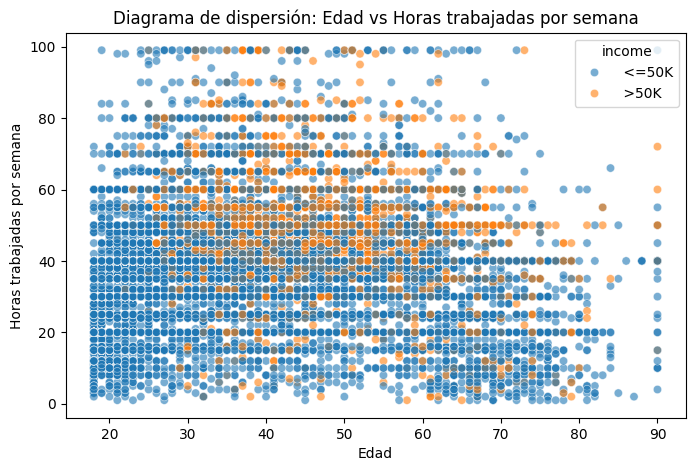


Primeras filas de la variable codificada 'education_encoded':
    education  education_encoded
0   Bachelors                  9
1   Bachelors                  9
2     HS-grad                 11
3        11th                  1
4   Bachelors                  9


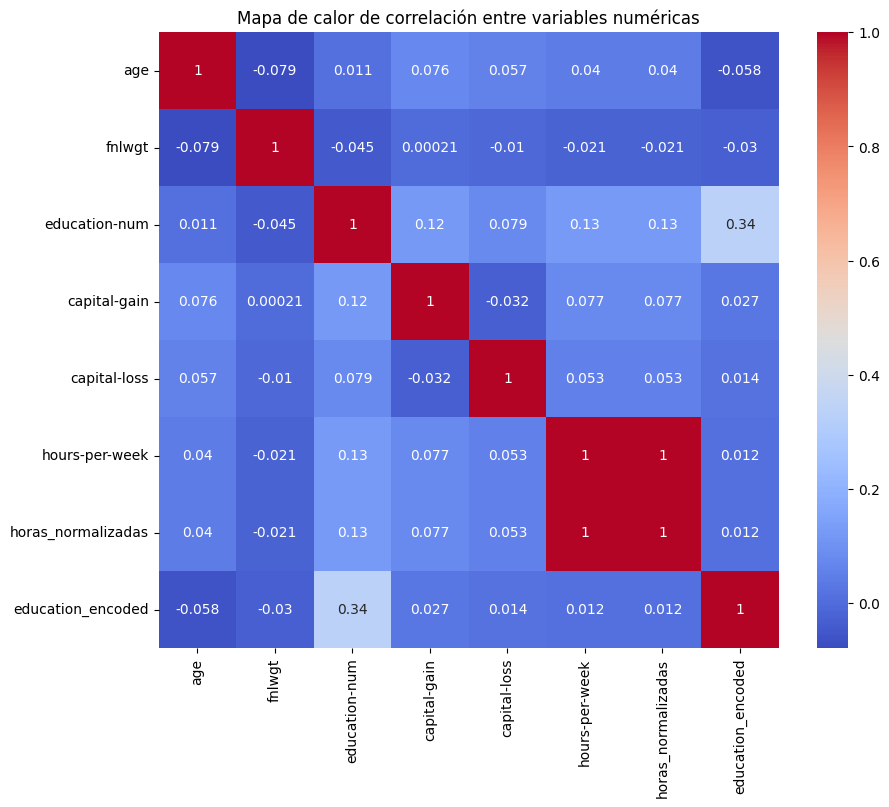

Dataset preprocesado guardado correctamente.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Subir archivo manualmente
uploaded = files.upload()
nombre_archivo = list(uploaded.keys())[0]  # Nombre del archivo subido

# Leer el archivo
columnas = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(nombre_archivo, header=None, names=columnas, na_values=' ?')

# Mostrar el tamaño inicial del dataset
print(f"Tamaño del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")

# 1. Eliminar duplicados
duplicados = df.duplicated().sum()
if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Se eliminaron {duplicados} duplicados. Tamaño actual: {df.shape[0]} filas")

# 2. Tratar valores fuera de rango en 'age'
registros_antes = df.shape[0]
df = df[(df['age'] >= 18) & (df['age'] <= 100)]
print(f"Registros eliminados por edades fuera de rango: {registros_antes - df.shape[0]}")

# 3. Verificar valores faltantes
print("\nValores faltantes por variable:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# 4. Rellenar valores faltantes
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna('Desconocido')

# Verificar que no haya valores faltantes
print("\nValores faltantes después del tratamiento:")
print(df.isnull().sum().sum())  # Esto debe ser 0

# 5. Crear la variable 'grupo_edad'
if 'grupo_edad' not in df.columns:
    df['grupo_edad'] = pd.cut(df['age'], bins=[18, 30, 50, 70, 100], labels=['Joven', 'Adulto', 'Adulto Mayor', 'Senior'])
print("\nDistribución de la variable 'grupo_edad':")
print(df['grupo_edad'].value_counts())

# Diagrama de barras de grupo de edad
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='grupo_edad', hue='income', palette='Set2')
plt.title("Distribución de ingresos por grupo de edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad")
plt.show()

# 6. Normalización de la variable 'hours-per-week'
scaler = StandardScaler()
df['horas_normalizadas'] = scaler.fit_transform(df[['hours-per-week']])
print("\nPrimeras filas de la variable normalizada 'horas_normalizadas':")
print(df[['hours-per-week', 'horas_normalizadas']].head())

# 7. Diagrama de dispersión 'age' vs 'hours-per-week'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=df, alpha=0.6)
plt.title("Diagrama de dispersión: Edad vs Horas trabajadas por semana")
plt.xlabel("Edad")
plt.ylabel("Horas trabajadas por semana")
plt.show()

# 8. Codificación de la variable categórica 'education'
le = LabelEncoder()
df['education_encoded'] = le.fit_transform(df['education'])
print("\nPrimeras filas de la variable codificada 'education_encoded':")
print(df[['education', 'education_encoded']].head())

# 9. Mapa de calor de correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlación entre variables numéricas")
plt.show()

# 10. Guardar dataset
df.to_csv('datos_preprocesados.csv', index=False)
print("Dataset preprocesado guardado correctamente.")
